# 1-Introduction

==================================================

Nama: Betara Candra Ariviyanto

batch : SBY - 002
 
objective : Analaysis data pada dataset penjualan Brand Adidas dan memberikan kesimpulan untuk meningkatkan profit penjualan pada bulan Januari tahun 2022

link Tableau : [Link Tableu](https://public.tableau.com/app/profile/betara.candra.ariviyanto/viz/Adidas_Sales_17058384569270/Dashboard1?publish=yes)
====================================================


- Import Library

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
from scipy import stats

# 2-Identifikasi Masalah

Penjabaran Problem Statement

Specific : Meningkatkan profit penjualan

Measurable :Meningkatkan profit sebanyak 10%

Achievable : Memilih produk yang memiliki operating margin yang tinggi dapat meningkatkan profit 

Relevant :  Tingkat Operating margin yang tinggi juga mendapatkan profit yang tinggi

Time - bound : Hasil dapat dilihat pada bulan Januari tahun 2022



Problem Statement
Tujuannya yaitu meningkatkan profit penjualan sebanyak 10% dengan memilih produk yang memiliki operating margin yang tinggi agar nilai profit juga tinggi. Hasil dapat dilihat pada bulan Januari tahun 2022 (Dengan target pada bulan januari 2022 profil penjualan meningkat )

Defining the problem:

1. Retailer apa yang  memiliki rata - rata  profit tinggi dan kecil? 

2. Bagaiamana rata - rata  profit dari tiap kota yang ada ?

3. Bagaiamana rata - rata Profit tiap Bulannya ?

4. Produk apa yang paling profit ? 

5. Confidence Interval dari profit bulan selanjutnya ? (Inferal)

6. Central Tendency produk yang paling profit ? (Descriptive)

# 3-Data Loading

[Link dataset penjualan Adidas](https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset)

In [5]:
df = pd.read_excel('adidas.xlsx')
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


Dataset penjual Adidas yang dapat di Explore untuk menganalisa dengan tujuan meningkatkan profit pada bulan Januari 2022

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


Tipe data yang dimiliki sudah sesuai dengan value atau isi dari kolom

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9643    False
9644    False
9645    False
9646    False
9647    False
Length: 9648, dtype: bool

# 4-Data Cleaning

### 4.1.1-Menghilangkan space menjadi - dan lower case

In [8]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','-')

In [9]:
df.columns

Index(['retailer', 'retailer-id', 'invoice-date', 'region', 'state', 'city',
       'product', 'price-per-unit', 'units-sold', 'total-sales',
       'operating-profit', 'operating-margin', 'sales-method'],
      dtype='object')

Spasi serta - hilang agar pengolahan dataframe tidak begitu rumit

In [10]:
df

,retailer,retailer-id,invoice-date,region,state,city,product,price-per-unit,units-sold,total-sales,operating-profit,operating-margin,sales-method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


### 4.1.2-Menghilangkan missing value

In [11]:
df.isnull().sum() 

retailer            0
retailer-id         0
invoice-date        0
region              0
state               0
city                0
product             0
price-per-unit      0
units-sold          0
total-sales         0
operating-profit    0
operating-margin    0
sales-method        0
dtype: int64

Dataset penjualan Adidas tidak memuat data kosong atau data yang tidak teriisi

## 4.2-Inconsistent Type

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   retailer          9648 non-null   object        
 1   retailer-id       9648 non-null   int64         
 2   invoice-date      9648 non-null   datetime64[ns]
 3   region            9648 non-null   object        
 4   state             9648 non-null   object        
 5   city              9648 non-null   object        
 6   product           9648 non-null   object        
 7   price-per-unit    9648 non-null   float64       
 8   units-sold        9648 non-null   int64         
 9   total-sales       9648 non-null   float64       
 10  operating-profit  9648 non-null   float64       
 11  operating-margin  9648 non-null   float64       
 12  sales-method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


Tipe data tiap kolom dataset Adidas sudah sesuai dengan isi dari kolom tersebut.

## 4.3- Save Data

In [53]:
df.to_csv('adidas_cleaning.csv')

# 5-EDA

## 5.1- Retailer yang memiliki nilai rata - rata profit paling tinggi dan rendah  

In [13]:
profittoko =  df.groupby('retailer')[['operating-profit']].mean()
profittoko = profittoko.sort_values('operating-profit' , ascending = True)
profittoko

,operating-profit
retailer,
Amazon,30367.232150
Foot Locker,30611.348051
Kohl's,35739.080175
West Gear,36085.877498
Sports Direct,36581.178622
Walmart,41185.387556


Terdapat 5 toko dalam dataset Adidas dengan rata - rata yang telah ditampilkan diatas

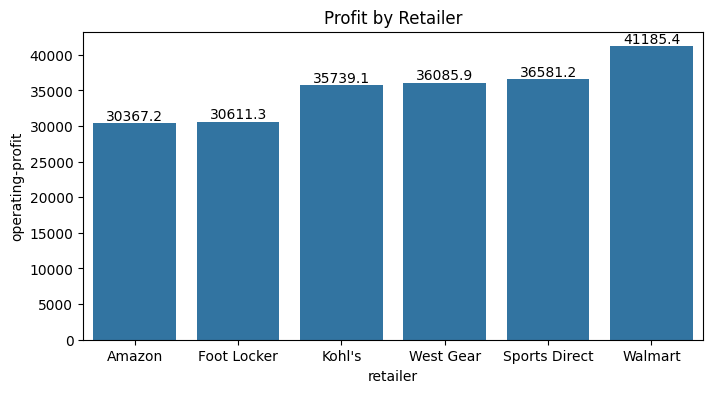

In [14]:
plt.figure(figsize=(8,4))
ax = sns.barplot (x = 'retailer', y= 'operating-profit', data = profittoko)
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Profit by Retailer")
plt.show()

Perbandingan nilai profit tiap toko dapat dilihat dalam bar Profit by Retailer. Dengan retailer Walmart paling tinggi serta retailer Amazon paling rendah. Dari data tersebut, penjualan pada toko Amazon  dapat ditingkatkan  

## 5.2- Kota yang  memiliki rata - rata  profit tinggi dan rendah

In [15]:
profit =  df.groupby('city')[['operating-profit']].mean()
profit = profit.sort_values('operating-profit' , ascending = True)
profit

,operating-profit
city,
Providence,14101.005833
Boston,15527.203102
Omaha,16940.822292
Salt Lake City,17932.542130
Des Moines,18439.009514
Minneapolis,18543.262222
Fargo,18670.275833
Oklahoma City,19011.722870
Baltimore,19150.292500


Terdapat 52 kota yang menjual sepatu Adidas, karena daftar kota terlalu banyak maka golongkan 5 kota dengan profit yang rendah dan tinggi

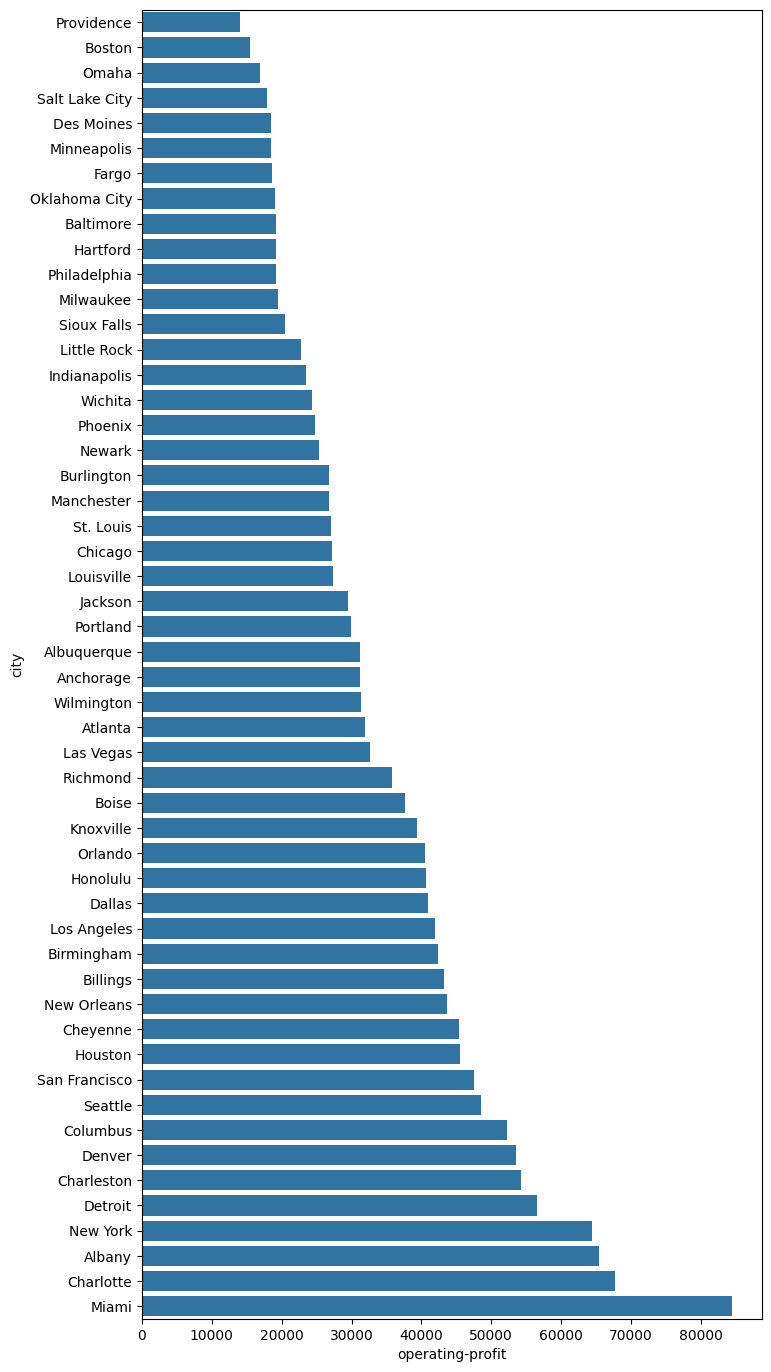

In [16]:
plt.figure(figsize=(8,17))
sns.barplot (x = 'operating-profit', y= 'city', data = profit)
plt.show()

Perbandingan antara 52 kota dengan profitnya. 

### 5.2.1 - 5 Kota yang memiliki rata - rata  profit rendah

In [17]:
profit =  df.groupby('city')[['operating-profit']].mean()
profit = profit.sort_values('operating-profit' , ascending = True).iloc[0:5]
profit

,operating-profit
city,
Providence,14101.005833
Boston,15527.203102
Omaha,16940.822292
Salt Lake City,17932.542130
Des Moines,18439.009514


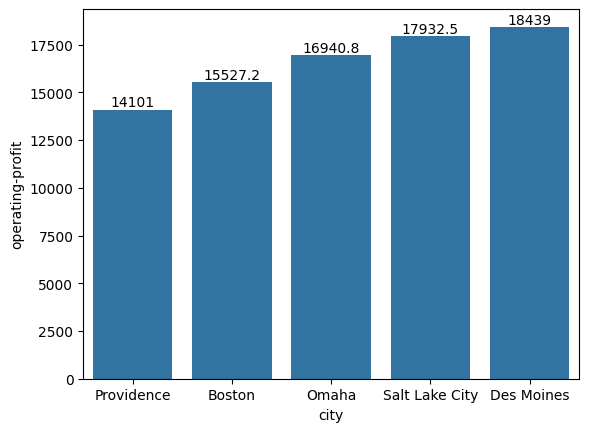

In [18]:
ax = sns.barplot (x = 'city', y= 'operating-profit', data = profit)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Dari 52 kota, kita ambil 5 kota dengan rata - rata profit paling rendah. Kota Providence mendapatkan rata - rata kota dengan operation profit paling rendah, hal ini dapat mengetahui bahwa kota Providence perlu ditingkatkan 

### 5.2.2 - 5 Kota yang memiliki rata - rata profit tinggi

In [19]:
profit =  df.groupby('city')[['operating-profit']].mean()
profit = profit.sort_values('operating-profit' , ascending = False).iloc[0:5]
profit

,operating-profit
city,
Miami,84504.299375
Charlotte,67752.936597
Albany,65485.075764
New York,64351.727593
Detroit,56499.264028


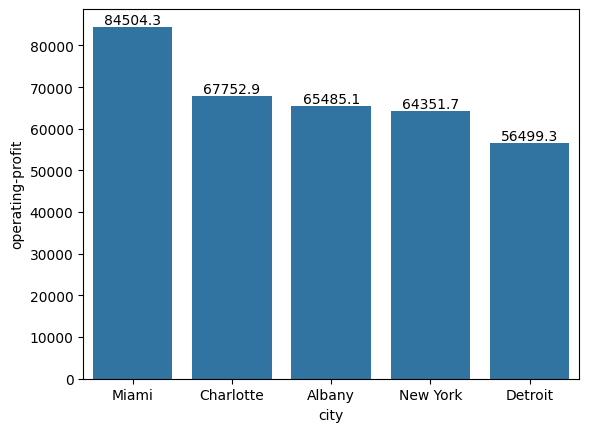

In [20]:
ax = sns.barplot (x = 'city', y= 'operating-profit', data = profit)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Dari 52 kota, kita ambil 5 kota dengan rata - rata profit paling tinggi. Hal ini dapat mengetahui bahwa kota Miami mendapatkan rata - rata profit yang tinggi. Penjualan produk di Kota Miami perlu dipertahankan atau dapat mengetahui informasi lagi mengenai faktor yang membuat tingkat profit yang tinggi

## 5.3-Rata - rata profit dari penjualan tiap bulan pada tahun 2020 dan 2021

In [47]:
profitbulan = df.groupby([df['invoice-date' ].dt.year,df['invoice-date'].dt.month])['operating-profit'].mean()

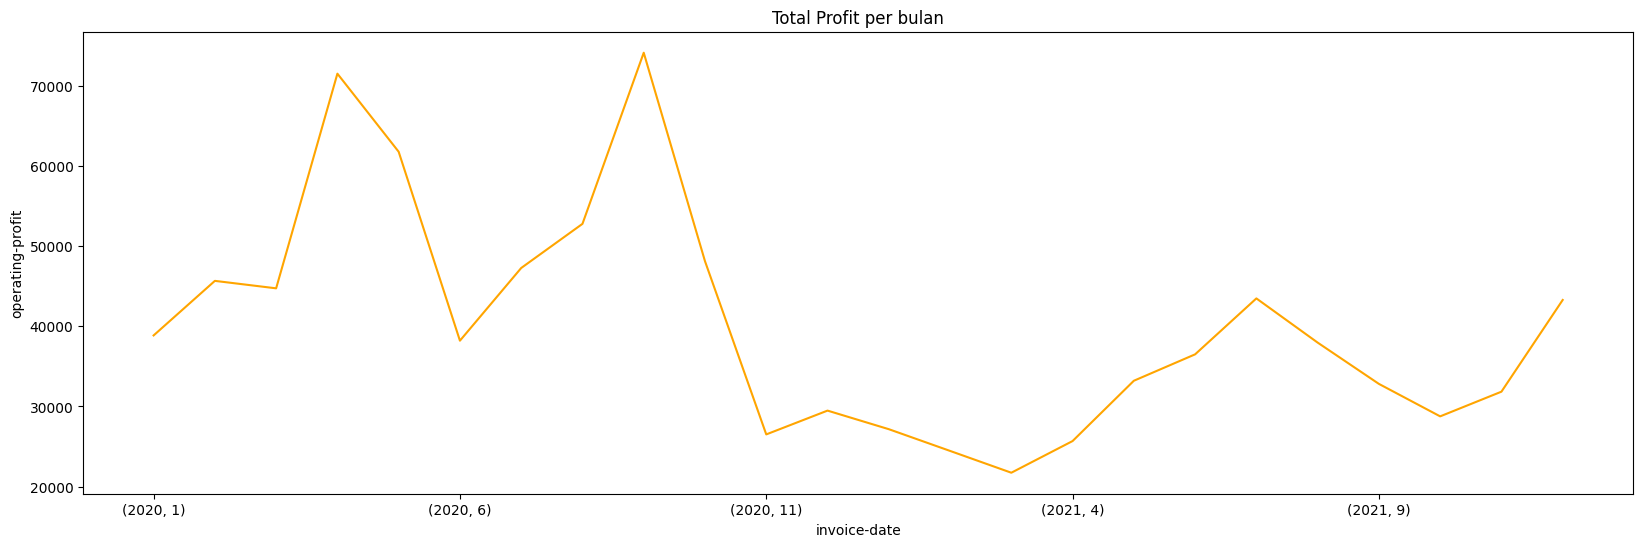

In [51]:
plt.figure(figsize=(20, 6))
profitbulan.plot(kind='line', color='orange')
plt.title('Total Profit per bulan')
plt.xlabel('invoice-date')
plt.ylabel('operating-profit')
plt.show()

Menggambarkan rata rata tiap bulannya pada tahun 2020 dan 2021. Bulan januari pada tahun 2020 dan 2021 masih dibawah 4000, pada penjualan bulan januari dapat ditingkatkan nilai salesnya, agar profit pada bulan januari Tahun 2022 meningkat

## 5.4- Produk dari Adidas yang memiliki rata - rata profit tinggi

In [22]:
profitproduct =  df.groupby('product')[['operating-profit']].mean()
profitproduct = profitproduct.sort_values('operating-profit' , ascending = True)
profitproduct

,operating-profit
product,
Women's Athletic Footwear,24268.857372
Men's Apparel,27872.372559
Women's Street Footwear,28044.668414
Men's Athletic Footwear,32203.036143
Women's Apparel,42693.389652
Men's Street Footwear,51429.975540


Produk yang memiliki rata rata profit tinggi yaitu Men's Street Footwear dengan nilai 51429. 

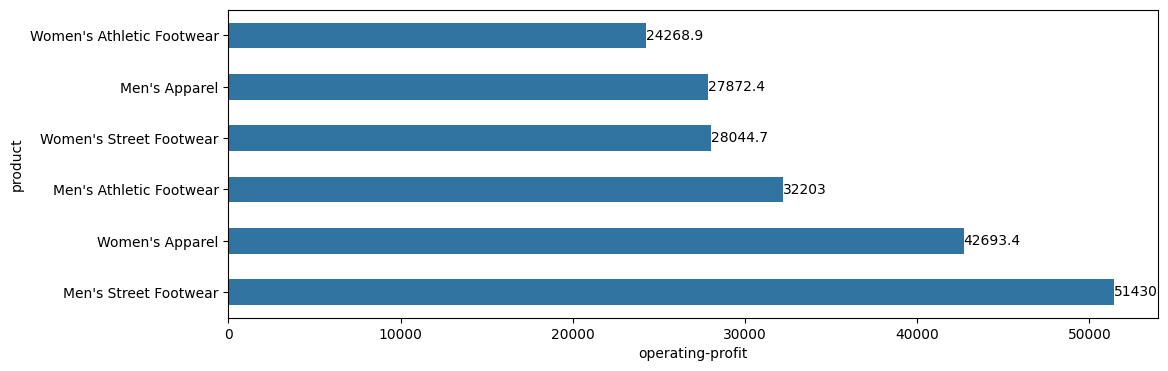

In [23]:
plt.figure(figsize=(12,4))
ax = sns.barplot (x = 'operating-profit', y= 'product', data = profitproduct, width=0.5)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Perbandingan  rata - rata tiap product, product Women's Athletic Footwear, Men's Apparel dan Men's Athletic Footwear memiliki tingkat rata rata yang rendah dan hampir sama. Produk terebut perlu lebih dipertimbangkan agar mendapatkan profit yang tinggi

## 5.5- Confidence Interval dari profit bulan selanjutnya

In [25]:
print('Rata - rata operating profit :', df['operating-profit'].mean())
print('Median operating profit :', df['operating-profit'].median())
print('Standard deviasi operating profit :', df['operating-profit'].std())

Rata - rata operating profit : 34425.244760572146
Median operating profit : 4371.42
Standard deviasi operating profit : 54193.11371323229


In [26]:
print('Nilai Skewness operating profit:', df['operating-profit'].skew())

Nilai Skewness operating profit: 2.2335982483835206


Data berdistribusi lebih ke kanan, data  terdistribusi tidak normal atau skewness 

In [30]:
std = df['operating-profit'].std()
N = len(df)
low, up = stats.norm.interval(0.95,loc=df['operating-profit'].mean(),scale=std/np.sqrt(N))
print('Lower operating profit Limit:',low)
print('Upper operating profit Limit:',up)

Lower operating profit Limit: 33343.87667491662
Upper operating profit Limit: 35506.612846227676


Dari data profit bulan bulan sebelumnya didapatkan nilai operating profit bawah yaitu 33343 dan nilai operating profit atas yaitu 35506. Lalu untuk pendapatan profit bulan Januari 2022 akan berada diantara 33343 sampai 35506

## 5.6- Central Tendency produk yang paling profit

In [36]:
dfpro = df.groupby('product')
dfpro1 = dfpro.get_group("Men's Street Footwear")
dfpro1

,retailer,retailer-id,invoice-date,region,state,city,product,price-per-unit,units-sold,total-sales,operating-profit,operating-margin,sales-method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
6,Foot Locker,1185732,2020-01-07,Northeast,New York,New York,Men's Street Footwear,50.0,1250,625000.0,312500.00,0.50,In-store
12,Foot Locker,1185732,2020-01-25,Northeast,New York,New York,Men's Street Footwear,50.0,1220,610000.0,305000.00,0.50,Outlet
18,Foot Locker,1185732,2020-01-31,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,Outlet
24,Foot Locker,1185732,2020-02-06,Northeast,New York,New York,Men's Street Footwear,60.0,1220,732000.0,366000.00,0.50,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9621,Foot Locker,1185732,2021-10-19,Northeast,New Hampshire,Manchester,Men's Street Footwear,52.0,162,8424.0,3538.08,0.42,Outlet
9627,Foot Locker,1185732,2021-11-18,Northeast,New Hampshire,Manchester,Men's Street Footwear,59.0,149,8791.0,3780.13,0.43,Outlet
9633,Foot Locker,1185732,2021-12-17,Northeast,New Hampshire,Manchester,Men's Street Footwear,49.0,200,9800.0,4606.00,0.47,Outlet
9639,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Street Footwear,36.0,165,5940.0,2197.80,0.37,Outlet


Mengelompokan product Men's Street Footwear karena memiliki rata - rata profit yang tinggi. 

In [52]:
print("Nilai rata - rata profit untuk product Men's Street Footwear:",dfpro1['operating-profit'].mean() ) 
print("Nilai tengah  untuk profit untuk product Men's Street Footwear:",dfpro1['operating-profit'].median() ) 
print("Nilai  profit yang sering didapatkan untuk product Men's Street Footwear:",dfpro1['operating-profit'].values[0] )

Nilai rata - rata profit untuk product Men's Street Footwear: 51429.975540372674
Nilai tengah  untuk profit untuk product Men's Street Footwear: 5661.15
Nilai  profit yang sering didapatkan untuk product Men's Street Footwear: 300000.0


Product Men's Street Footwear memiliki rata - rata 51429 dari berbagai retailer serta negara yang ada pada dataset. Profit yang sering didapatkan dari product Men's Street Footwear dari tiap retailer serta negara adalah 300000

# 6-Conclusion

- Dalam perbandingan tiap retailer penjualan sepatu Adidas, retailer yang ada di Website Amazon terbilang rendah. Dapat mengurangi mengikuti promo yang ada di Amazon untuk meningkatkan profit. 
- Terdapat 52 negara yang menjual product Adidas. Kota Providence memiliki tingkat profit rendah, hal ini perlu dipertimbangkan untuk mencari Kota lain atau lebih fokus meningkatkan profit pada Kota tersebut.
- Dari line chart, dapat disimpulkan bahwa bulan Januari pada tahun 2020 dan 2021 masih dibawah dari bulan bulan lainnya. Maka pada bulan januari tersebut perlu membuat strategi untuk menyesuaikan bulan dengan tingkat profit tinggi
- Perbandingan  rata - rata tiap product, product Women's Athletic Footwear, Men's Apparel dan Men's Athletic Footwear memiliki tingkat rata rata yang rendah hampir sama. Produk tersebut perlu lebih dipertimbangkan agar mendapatkan profit yang tinggi